In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls nyiso_load/20170101pal_csv/

20170101pal.csv 20170108pal.csv 20170115pal.csv 20170122pal.csv 20170129pal.csv
20170102pal.csv 20170109pal.csv 20170116pal.csv 20170123pal.csv 20170130pal.csv
20170103pal.csv 20170110pal.csv 20170117pal.csv 20170124pal.csv 20170131pal.csv
20170104pal.csv 20170111pal.csv 20170118pal.csv 20170125pal.csv
20170105pal.csv 20170112pal.csv 20170119pal.csv 20170126pal.csv
20170106pal.csv 20170113pal.csv 20170120pal.csv 20170127pal.csv
20170107pal.csv 20170114pal.csv 20170121pal.csv 20170128pal.csv


In [7]:
df_int = pd.read_csv('nyiso_load/' + '20170101pal_csv/' + '20170101pal.csv', parse_dates = ['Time Stamp'])

In [8]:
df_int.head()

,Time Stamp,Time Zone,Name,PTID,Load
0,2017-01-01,EST,CAPITL,61757,1211.6
1,2017-01-01,EST,CENTRL,61754,1671.9
2,2017-01-01,EST,DUNWOD,61760,620.2
3,2017-01-01,EST,GENESE,61753,978.6
4,2017-01-01,EST,HUD VL,61758,1012.3


In [9]:
nyc_ind = df_int.Name.apply(lambda x: 'N.Y.C.' in x)
df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'Load']].reset_index(drop = True)

In [10]:
df_nyc.head()

,Time Stamp,Load
0,2017-01-01 00:00:00,5116.9
1,2017-01-01 00:05:00,5102.1
2,2017-01-01 00:10:00,5074.9
3,2017-01-01 00:15:00,5089.6
4,2017-01-01 00:20:00,5061.3


In [12]:
df_nyc.columns = ['time_stamp', 'load']

In [13]:
df_nyc.set_index('time_stamp', inplace = True)

df_nyc['time_stamp_local'] = df_nyc.index

df_nyc.set_index(df_nyc.index.tz_localize('US/Eastern'), inplace = True)

In [14]:
df_nyc.head()

,load,time_stamp_local
time_stamp,,
2017-01-01 00:00:00-05:00,5116.9,2017-01-01 00:00:00
2017-01-01 00:05:00-05:00,5102.1,2017-01-01 00:05:00
2017-01-01 00:10:00-05:00,5074.9,2017-01-01 00:10:00
2017-01-01 00:15:00-05:00,5089.6,2017-01-01 00:15:00
2017-01-01 00:20:00-05:00,5061.3,2017-01-01 00:20:00


In [15]:
df_nyc.set_index(df_nyc.index.tz_convert('GMT'), inplace = True)

In [16]:
df_nyc.head()

,load,time_stamp_local
time_stamp,,
2017-01-01 05:00:00+00:00,5116.9,2017-01-01 00:00:00
2017-01-01 05:05:00+00:00,5102.1,2017-01-01 00:05:00
2017-01-01 05:10:00+00:00,5074.9,2017-01-01 00:10:00
2017-01-01 05:15:00+00:00,5089.6,2017-01-01 00:15:00
2017-01-01 05:20:00+00:00,5061.3,2017-01-01 00:20:00


In [17]:
def select_nyc(dir_path, filename):
    df_int = pd.read_csv(dir_path + filename, parse_dates = ['Time Stamp'])#, dtype={'Integrated Load' : np.float64})
    nyc_ind = df_int.Name.apply(lambda x: 'N.Y.C.' in x)
    df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'Load']].reset_index(drop = True)
    df_nyc.columns = ['time_stamp', 'load']
    df_nyc.set_index('time_stamp', inplace = True)
    df_nyc['time_stamp_local'] = df_nyc.index
    df_nyc.set_index(df_nyc.index.tz_localize('US/Eastern', ambiguous='infer'), inplace = True)
    df_nyc.set_index(df_nyc.index.tz_convert('GMT'), inplace = True)
    output_filename = filename[:8] + 'nyc.csv'
    df_nyc.to_csv(dir_path + output_filename)
    return df_nyc

In [19]:
df_t = pd.DataFrame()
for dir_path in os.listdir('nyiso_load/'):
    if 'csv' in dir_path:
        dir_path = 'nyiso_load/' + dir_path + '/'
        for filename in os.listdir(dir_path):
            if 'pal' in filename:
                df_t = pd.concat([df_t, select_nyc(dir_path, filename)])
                #select_nyc(dir_path, filename)

In [20]:
df_t.head()

,load,time_stamp_local
time_stamp,,
2017-12-20 05:00:00+00:00,4969.7,2017-12-20 00:00:00
2017-12-20 05:05:00+00:00,4939.9,2017-12-20 00:05:00
2017-12-20 05:10:00+00:00,4903.5,2017-12-20 00:10:00
2017-12-20 05:15:00+00:00,4864.9,2017-12-20 00:15:00
2017-12-20 05:20:00+00:00,4844.5,2017-12-20 00:20:00


In [21]:
df_t.dtypes

load                       float64
time_stamp_local    datetime64[ns]
dtype: object

In [ ]:
def is_number(s):
    try:
        float(s)
        return float(s)
    except ValueError:
        return 0.

In [ ]:
df_t.loc[:,'integrated_load'] = df_t.integrated_load.apply(is_number)

In [ ]:
#df_cmp = pd.read_csv('nyiso_2017.csv', parse_dates=['time_stamp'])

In [31]:
# fig, ax = plt.subplots(figsize = (8, 8))
# #ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'integrated_load'], '.')
# ax.plot(df_t.index, df_t.loc[:,'time_stamp_local'], '.', label = 'GMT')
# # ax.set_xlim(pd.datetime(2016,3,13), pd.datetime(2016,3,14))
# # ax.set_ylim(pd.datetime(2016,3,13), pd.datetime(2016,3,14))
# ax.set_xlim(pd.datetime(2016,11,6), pd.datetime(2016,11,7))
# ax.set_ylim(pd.datetime(2016,11,6), pd.datetime(2016,11,7))

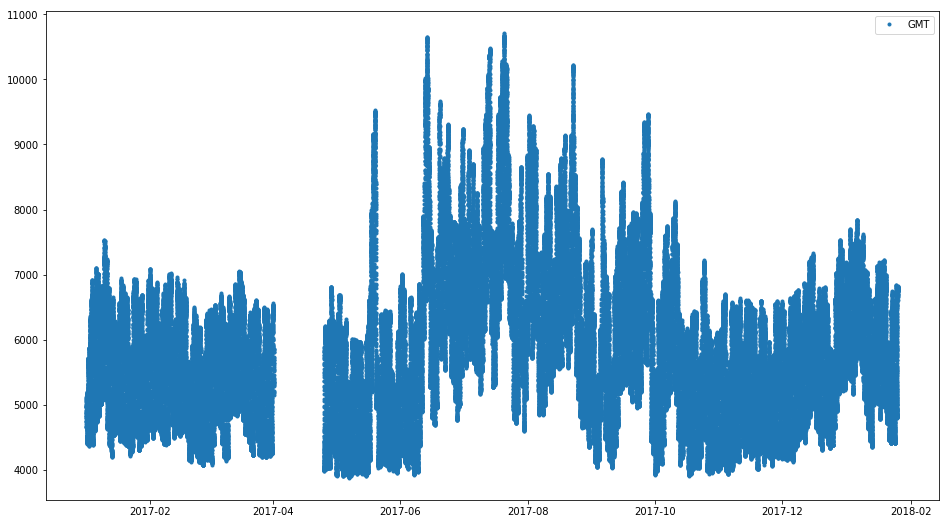

In [29]:
fig, ax = plt.subplots(figsize = (16, 9))
#ax.plot(df_t.loc[:,'time_stamp_local'], df_t.loc[:,'integrated_load'], '.')
ax.plot(df_t.index, df_t.loc[:,'load'], '.', label = 'GMT')
#ax.plot(df_cmp.iloc[:,0], df_cmp.iloc[:,1], '.', label = 'EST')
ax.legend()
#ax.set_xlim(pd.datetime(2017,3,8), pd.datetime(2017,3,15))

In [34]:
df_t.shape

(106171, 2)

In [27]:
df_t.dtypes

load                       float64
time_stamp_local    datetime64[ns]
dtype: object

In [22]:
df_t.head()

,load,time_stamp_local
time_stamp,,
2017-12-20 05:00:00+00:00,4969.7,2017-12-20 00:00:00
2017-12-20 05:05:00+00:00,4939.9,2017-12-20 00:05:00
2017-12-20 05:10:00+00:00,4903.5,2017-12-20 00:10:00
2017-12-20 05:15:00+00:00,4864.9,2017-12-20 00:15:00
2017-12-20 05:20:00+00:00,4844.5,2017-12-20 00:20:00


In [23]:
df_t.sort_index(inplace = True)

In [24]:
df_t.head()

,load,time_stamp_local
time_stamp,,
2017-01-01 05:00:00+00:00,5116.9,2017-01-01 00:00:00
2017-01-01 05:05:00+00:00,5102.1,2017-01-01 00:05:00
2017-01-01 05:10:00+00:00,5074.9,2017-01-01 00:10:00
2017-01-01 05:15:00+00:00,5089.6,2017-01-01 00:15:00
2017-01-01 05:20:00+00:00,5061.3,2017-01-01 00:20:00


In [25]:
df_t.tail()

,load,time_stamp_local
time_stamp,,
2018-01-25 18:40:00+00:00,6771.2,2018-01-25 13:40:00
2018-01-25 18:45:00+00:00,6769.0,2018-01-25 13:45:00
2018-01-25 18:50:00+00:00,6752.4,2018-01-25 13:50:00
2018-01-25 18:55:00+00:00,NaN,2018-01-25 13:55:00
2018-01-25 19:00:00+00:00,NaN,2018-01-25 14:00:00


In [35]:
df_t.dropna(inplace=True)

In [36]:
df_t.shape

(106168, 2)

In [37]:
df_t.to_csv('nyiso_load_2017.csv')

In [ ]:
df_test = pd.read_csv('nyiso_2017.csv', parse_dates=['time_stamp', 'time_stamp_local'])

In [ ]:
df_test.head()

In [ ]:
df_test.time_stamp.dtype

In [ ]:
df_test.sort_values(['time_stamp'], inplace = True)

In [ ]:
df_test.head()

In [ ]:
df_test.to_csv('nyiso_2017.csv', index = False)